<a href="https://colab.research.google.com/github/Fatema2525/skills-introduction-to-github/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
data=pd.read_csv('/content/gld_price_data.csv')

In [5]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
data.shape

(2290, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [9]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
new=data.drop('Date',axis=1)
correlation=new.corr()

<Axes: >

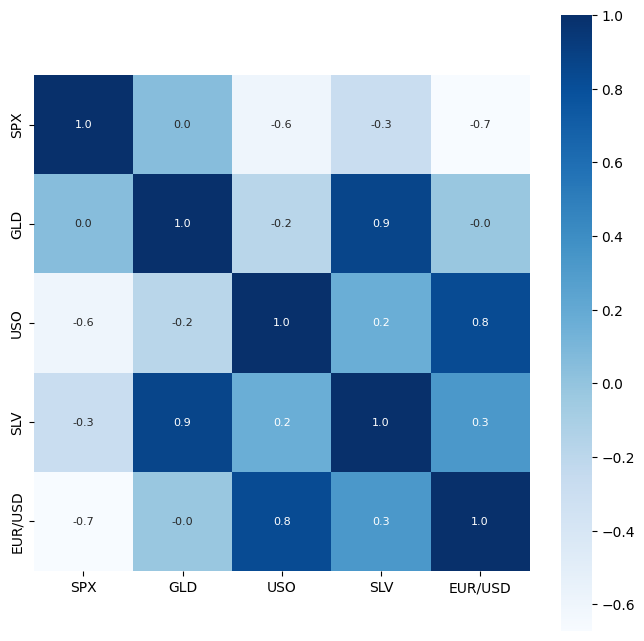

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [16]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-2396540178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

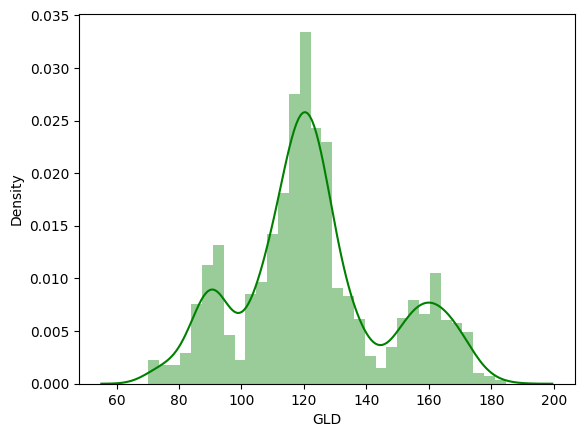

In [18]:
sns.distplot(new['GLD'],color='green')

In [19]:
X=new.drop('GLD',axis=1)
Y=new['GLD']

In [20]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [21]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)


In [24]:
print(X.shape,X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [25]:
regrassor=RandomForestRegressor()

In [26]:
regrassor.fit(X_train,Y_train)

RandomForestRegressor()

In [28]:
test_data_prediction=regrassor.predict(X_test)
print(test_data_prediction)

[168.67119924  82.04009977 116.31739982 127.60770082 120.7020014
 154.77889752 150.01369768 125.91990067 117.27599876 126.04670059
 116.63010095 171.49560104 141.6305982  167.88379833 115.24120005
 117.18230043 139.42970336 170.2691006  159.39480265 160.16509938
 155.16700006 125.2174001  175.49160029 157.31540392 125.17100026
  93.85929967  77.43270009 120.33410003 119.17769948 167.50059962
  88.22850068 125.03610028  91.14770095 117.71050023 121.11259894
 135.95990055 115.3987011  115.40750076 148.75150008 106.87530091
 104.64390273  86.98359787 126.55210091 118.18839996 152.81359974
 119.6837     108.31610007 107.85999826  93.17460068 126.99259807
  75.20280055 113.59069905 121.27110025 111.20549869 118.89709911
 121.20919902 158.69090019 168.01160158 147.01919738  85.82779871
  94.06130032  86.720399    90.45429978 118.9793008  126.49950072
 127.55690028 167.77419948 122.31529938 117.32819911  98.71060094
 168.17150062 143.40039843 131.72270277 121.13880203 121.5889996
 119.8210005

In [29]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.988995269780058


In [30]:
Y_test=list(Y_test)

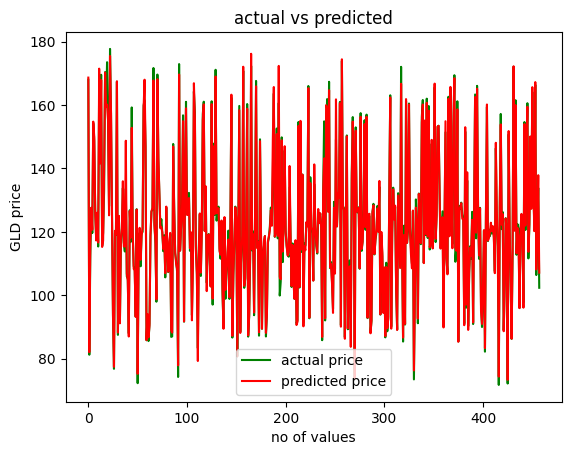

In [31]:
plt.plot(Y_test,color='green',label='actual price')
plt.plot(test_data_prediction,color='red',label='predicted price')
plt.title('actual vs predicted')
plt.xlabel('no of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()